<b><font size="6">Predictive Modelling Pipeline Template</font></b><br><br>

In this notebook we present to you the main steps you should follow throughout your project.


<b> Important: The numbered sections and subsections are merely indicative of some of the steps you should pay attention to in your project. <br>You are not required to strictly follow this order or to execute everything in separate cells.</b>
    
<img src="image/process_ML.png" style="height:70px">

In [31]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

import optuna

<a class="anchor" id="">

# 1. Import data (Data Integration)

</a>


<img src="image/step1.png" style="height:60px">

In [32]:
# Load the data in a simple way
obesity_train_raw = pd.read_csv('../data/obesity_train.csv')
obesity_test_raw = pd.read_csv('../data/obesity_test.csv') 

In [33]:
obesity_train_raw.head(10)

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,...,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
0,1,21.0,Never,no,up to 5,Sometimes,Female,1.62,NaN,3.0,...,yes,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,64.0,Normal_Weight
1,2,23.0,Frequently,no,up to 5,Sometimes,Male,1.80,NaN,3.0,...,yes,3 to 4,LatAm,0.0,no,Public,Sometimes,1 to 2,77.0,Normal_Weight
2,3,NaN,Frequently,no,up to 2,Sometimes,Male,1.80,NaN,3.0,...,no,3 to 4,LatAm,2.0,no,Walk,Always,1 to 2,87.0,Overweight_Level_I
3,4,22.0,Sometimes,no,up to 2,Sometimes,Male,1.78,NaN,1.0,...,no,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,90.0,Overweight_Level_II
4,5,22.0,Sometimes,no,up to 2,Sometimes,Male,1.64,NaN,3.0,...,no,5 or more,LatAm,3.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight
5,6,24.0,Frequently,yes,up to 5,Sometimes,Male,1.78,NaN,3.0,...,yes,1 to 2,LatAm,2.0,no,Public,Always,1 to 2,64.0,Normal_Weight
6,7,21.0,Sometimes,yes,up to 5,Frequently,Female,1.72,NaN,3.0,...,yes,3 to 4,NaN,2.0,no,Public,Sometimes,1 to 2,80.0,Overweight_Level_II
7,8,22.0,Sometimes,no,up to 2,Sometimes,Male,1.65,NaN,3.0,...,no,3 to 4,LatAm,1.0,no,Public,Always,more than 2,56.0,Normal_Weight
8,9,41.0,Frequently,yes,up to 5,Sometimes,Male,1.80,NaN,3.0,...,no,3 to 4,LatAm,0.0,no,Car,Sometimes,1 to 2,99.0,Obesity_Type_I
9,10,27.0,Sometimes,yes,up to 2,Sometimes,Male,1.93,NaN,1.0,...,yes,1 to 2,LatAm,2.0,no,Public,Sometimes,less than 1,102.0,Overweight_Level_II


In [34]:
obesity_test_raw.head(10)

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight
0,1612,21.0,Sometimes,no,up to 2,Sometimes,Female,1.52,NaN,3.0,yes,yes,5 or more,LatAm,3.0,yes,Public,Always,more than 2,56.0
1,1613,29.0,Sometimes,yes,up to 2,Sometimes,Male,1.62,NaN,3.0,no,no,NaN,LatAm,3.0,no,Car,Sometimes,1 to 2,53.0
2,1614,23.0,Sometimes,NaN,up to 2,Sometimes,Female,1.50,NaN,3.0,no,yes,1 to 2,LatAm,2.0,no,Motorbike,Always,1 to 2,NaN
3,1615,22.0,Never,yes,up to 5,Sometimes,Male,1.72,NaN,3.0,no,yes,1 to 2,LatAm,1.0,no,Public,Sometimes,1 to 2,68.0
4,1616,26.0,Sometimes,yes,more than 5,Frequently,Male,1.85,NaN,3.0,no,yes,3 to 4,LatAm,1.0,no,Public,Always,more than 2,105.0
5,1617,23.0,Sometimes,yes,up to 5,Sometimes,Male,1.77,NaN,1.0,no,yes,1 to 2,LatAm,2.0,no,Public,Always,less than 1,60.0
6,1618,22.0,Sometimes,no,up to 5,Always,Female,1.70,NaN,3.0,yes,yes,3 to 4,LatAm,1.0,no,Public,Always,1 to 2,NaN
7,1619,29.0,Never,yes,up to 2,Sometimes,Female,1.53,NaN,1.0,no,no,NaN,LatAm,0.0,no,Car,Sometimes,1 to 2,78.0
8,1620,30.0,Never,yes,up to 2,Frequently,Female,1.71,NaN,4.0,no,yes,NaN,LatAm,0.0,yes,Car,Always,less than 1,82.0
9,1621,23.0,Sometimes,yes,up to 5,Frequently,Female,1.60,NaN,4.0,no,no,3 to 4,LatAm,3.0,no,Car,Sometimes,1 to 2,52.0


<a class="anchor" id="">

# 2. Explore data (Data access, exploration and understanding)

</a>

<img src="image/step2.png" style="height:60px">

Remember, this step is very important as it is at this stage that you will really look into the data that you have. Generally speaking, if you do well at this stage, the following stages will be very smooth.

Moreover, you should also take the time to find meaningful patterns on the data: what interesting relationships can be found between the variables and how can that knowledge be inform your future decisions.

In [35]:
# Display information about the training dataset
obesity_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1611 non-null   int64  
 1   age                        1545 non-null   float64
 2   alcohol_freq               1575 non-null   object 
 3   caloric_freq               1591 non-null   object 
 4   devices_perday             1589 non-null   object 
 5   eat_between_meals          1552 non-null   object 
 6   gender                     1591 non-null   object 
 7   height                     1597 non-null   float64
 8   marrital_status            0 non-null      float64
 9   meals_perday               1602 non-null   float64
 10  monitor_calories           1572 non-null   object 
 11  parent_overweight          1591 non-null   object 
 12  physical_activity_perweek  1046 non-null   object 
 13  region                     1544 non-null   objec

<a class="anchor" id="">

# 3. Modify data (Data preparation)

</a>

<img src="image/step3.png" style="height:60px">

Use this section to apply transformations to your dataset.

Remember that your decisions at this step should be exclusively informed by your **training data**. While you will need to split your data between training and validation, how that split will be made and how to apply the approppriate transformations will depend on the type of model assessment solution you select for your project (each has its own set of advantages and disadvantages that you need to consider). **Please find a list of possible methods for model assessment below**:

1. **Holdout method**
2. **Repeated Holdout method**
3. **Cross-Validation**

__Note:__ Instead of creating different sections for the treatment of training and validation data, you can make the transformations in the same cell. There is no need to create a specific section for that.

### 3.1. Data Preparation

In [36]:
# Drop the 'marrital_status' and 'region' columns from the dataset
obesity_train = obesity_train_raw.drop(columns=['marrital_status', 'region'])
obesity_test = obesity_test_raw.drop(columns=['marrital_status', 'region'])

In [37]:
obesity_train.set_index('id', inplace=True)
obesity_test.set_index('id', inplace=True)
obesity_train

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
id,,,,,,,,,,,,,,,,,,
1,21.0,Never,no,up to 5,Sometimes,Female,1.62,3.0,no,yes,NaN,3.0,no,Public,Sometimes,1 to 2,64.0,Normal_Weight
2,23.0,Frequently,no,up to 5,Sometimes,Male,1.80,3.0,no,yes,3 to 4,0.0,no,Public,Sometimes,1 to 2,77.0,Normal_Weight
3,NaN,Frequently,no,up to 2,Sometimes,Male,1.80,3.0,no,no,3 to 4,2.0,no,Walk,Always,1 to 2,87.0,Overweight_Level_I
4,22.0,Sometimes,no,up to 2,Sometimes,Male,1.78,1.0,no,no,NaN,3.0,no,Public,Sometimes,1 to 2,90.0,Overweight_Level_II
5,22.0,Sometimes,no,up to 2,Sometimes,Male,1.64,3.0,no,no,5 or more,3.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,21.0,Sometimes,NaN,up to 5,Sometimes,Female,1.73,3.0,no,yes,3 to 4,1.0,no,Public,Always,1 to 2,131.0,Obesity_Type_III
1608,22.0,Sometimes,yes,up to 5,Sometimes,Female,1.75,3.0,no,yes,1 to 2,0.0,no,NaN,Always,1 to 2,134.0,Obesity_Type_III
1609,23.0,Sometimes,yes,up to 5,Sometimes,Female,1.75,3.0,no,yes,1 to 2,0.0,no,Public,Always,1 to 2,134.0,Obesity_Type_III


In [38]:
# Selecting outliers for which the age is out of scope. Or the weight classification is suspiciously low for the value given
outliers = obesity_train[
    ((obesity_train['age'] < 16) & ~(obesity_train['age'].isna())) |
    ((obesity_train['age'] > 56) & ~(obesity_train['age'].isna())) |
    ((obesity_train['weight'] > 167) & ~(obesity_train['weight'].isna()))
]
obesity_train.drop(outliers.index, inplace=True)
obesity_train.reset_index(drop=True, inplace=True)

In [39]:
obesity_train.shape # Shape adds up to our expectation (6 rows deleted) 1611 -> 1605 rows

(1605, 18)

# Encoding categorical data

In [40]:
categorical_columns = obesity_train.select_dtypes(include='object').columns
numerical_columns = obesity_train.select_dtypes(exclude='object').columns

In [41]:
obesity_train.columns

Index(['age', 'alcohol_freq', 'caloric_freq', 'devices_perday',
       'eat_between_meals', 'gender', 'height', 'meals_perday',
       'monitor_calories', 'parent_overweight', 'physical_activity_perweek',
       'siblings', 'smoke', 'transportation', 'veggies_freq', 'water_daily',
       'weight', 'obese_level'],
      dtype='object')

In [42]:
hashmap = {
"Never": 0,
"Sometimes": 1,
"Frequently": 2,
"Always": 3,

"No Activity": 0,
"up to 2": 1,
"up to 5": 2,
"more than 5": 3,

"less than 1": 1,
"1 to 2": 2,
"more than 2": 3,
"3 to 4": 4,
"5 or more": 5,

"Bicycle": 1,
"Car": 3,
"Motorbike": 3,
"Public": 2,
"Walk": 0,

"no": 0,
"yes": 1,

"Male": 0,
"Female": 1
}

In [43]:
# Manually encode data

columns = ['alcohol_freq',
 'caloric_freq',
 'devices_perday',
 'eat_between_meals',
 'gender',
 'monitor_calories',
 'parent_overweight',
 'physical_activity_perweek',
 'smoke',
 'transportation',
 'veggies_freq',
 'water_daily',
 'meals_perday',
 "siblings"]

for target in columns:
    obesity_train[target] = obesity_train[target].replace(hashmap)

In [44]:
obesity_train_encoded = obesity_train.copy()
obesity_train_encoded.isna().sum()

age                           65
alcohol_freq                  36
caloric_freq                  20
devices_perday                21
eat_between_meals             59
gender                        20
height                        13
meals_perday                   9
monitor_calories              39
parent_overweight             20
physical_activity_perweek    564
siblings                      12
smoke                         12
transportation                40
veggies_freq                  26
water_daily                   34
weight                        53
obese_level                    0
dtype: int64

# Handling Missing Values

In [45]:
# Impute with mode and median as the first null-handling resolution. Will be re-approached with further iterations on the model itself

obesity_train_encoded['physical_activity_perweek'].fillna(0, inplace=True) # ASSUMPTION: There is no 0 value in the scope. We assume nulls are the people who dont work out

In [46]:
X = obesity_train_encoded.drop(columns='obese_level')
y = obesity_train_encoded[['obese_level']]

In [47]:
X.isna().sum()

age                          65
alcohol_freq                 36
caloric_freq                 20
devices_perday               21
eat_between_meals            59
gender                       20
height                       13
meals_perday                  9
monitor_calories             39
parent_overweight            20
physical_activity_perweek     0
siblings                     12
smoke                        12
transportation               40
veggies_freq                 26
water_daily                  34
weight                       53
dtype: int64

# Original imputing function



data_knnimputer_train = X.copy()

numerical_columns_features = numerical_columns

scaler = StandardScaler()
data_knnimputer_train[numerical_columns_features] = scaler.fit_transform(data_knnimputer_train[numerical_columns_features])

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
data_knnimputer_train[numerical_columns_features] = knn_imputer.fit_transform(data_knnimputer_train[numerical_columns_features])

data_knnimputer_train[numerical_columns_features] = scaler.inverse_transform(data_knnimputer_train[numerical_columns_features])

print(data_knnimputer_train.isna().sum())

In [130]:
def knn_impute(X_train, X_val, numerical_columns, n_neighbors=5):

    # Create copies for KNN imputation
    data_knnimputer_train = X_train.copy()
    data_knnimputer_val = X_val.copy()

    # Specify the columns to scale
    numerical_columns_features = numerical_columns

    # Scale the data for KNN imputation
    scaler = StandardScaler()
    data_knnimputer_train[numerical_columns_features] = scaler.fit_transform(data_knnimputer_train[numerical_columns_features])
    data_knnimputer_val[numerical_columns_features] = scaler.transform(data_knnimputer_val[numerical_columns_features])

    # Perform KNN imputation
    knn_imputer = KNNImputer(n_neighbors=n_neighbors, weights='uniform')
    data_knnimputer_train[numerical_columns_features] = knn_imputer.fit_transform(data_knnimputer_train[numerical_columns_features])
    data_knnimputer_val[numerical_columns_features] = knn_imputer.transform(data_knnimputer_val[numerical_columns_features])

    # Inverse transform to original scale
    data_knnimputer_train[numerical_columns_features] = scaler.inverse_transform(data_knnimputer_train[numerical_columns_features])
    data_knnimputer_val[numerical_columns_features] = scaler.inverse_transform(data_knnimputer_val[numerical_columns_features])

    return data_knnimputer_train, data_knnimputer_val

Add BMI

In [49]:
def classify_bmi_comprehensive(row):
    """
    Classify BMI based on age and BMI value.

    Input:
    row: A Pandas row with 'weight', 'height', and 'age' columns.

    Output:
    Returns a string that classifies the individual into BMI categories.
    """
    # Check if weight and height are valid
    if row['height'] <= 0 or row['weight'] <= 0:
        return 'Invalid data'

    # Calculate BMI
    bmi = row['weight'] / (row['height'] ** 2)

    # Age group: Children (2-19 years)
    if 2 <= row['age'] < 20:
        if bmi < 14:
            return 0 # Underweight
        elif 14 <= bmi < 18:
            return 1 # Normal weight
        elif 18 <= bmi < 21:
            return 2 # Overweight
        else:
            return 3 # Obesity 1

    # Age group: Adults (20-64 years)
    elif 20 <= row['age'] < 65:
        if bmi < 18.5:
            return 0 # "Underweight"
        elif 18.5 <= bmi < 25:
            return 1 # "Healthy Weight"
        elif 25 <= bmi < 30:
            return 2 #"Overweight"
        elif 30<= bmi < 35:
            return 3 #"Obese Class 1"
        elif 35 <= bmi < 40:
            return 4 #"Obese Class 2"
        else:
            return 5 #"Obese Class 3"

In [50]:
def classify_bmi(df):
    """
    Classify BMI based on age and BMI value for an entire DataFrame.

    Input:
    df: A Pandas DataFrame with 'weight', 'height', and 'age' columns.

    Output:
    Returns a series with BMI classifications.
    """
    # Create a copy to avoid modifying original
    df = df.copy()
    
    # Calculate BMI for all rows
    bmi = df['weight'] / (df['height'] ** 2)
    
    # Initialize results array
    classifications = pd.Series(index=df.index, dtype=int)
    
    # Invalid data mask
    invalid_mask = (df['height'] <= 0) | (df['weight'] <= 0)
    
    # Children mask (2-19 years)
    children_mask = (df['age'] >= 2) & (df['age'] < 20)
    
    # Adult mask (20-64 years)
    adult_mask = (df['age'] >= 20) & (df['age'] < 65)
    
    # Classify children
    children_class = pd.Series(index=df.index, dtype=int)
    children_class[bmi < 14] = 0
    children_class[(bmi >= 14) & (bmi < 18)] = 1
    children_class[(bmi >= 18) & (bmi < 21)] = 2
    children_class[bmi >= 21] = 3
    
    # Classify adults
    adult_class = pd.Series(index=df.index, dtype=int)
    adult_class[bmi < 18.5] = 0
    adult_class[(bmi >= 18.5) & (bmi < 25)] = 1
    adult_class[(bmi >= 25) & (bmi < 30)] = 2
    adult_class[(bmi >= 30) & (bmi < 35)] = 3
    adult_class[(bmi >= 35) & (bmi < 40)] = 4
    adult_class[bmi >= 40] = 5
    
    # Combine classifications
    classifications[children_mask] = children_class[children_mask]
    classifications[adult_mask] = adult_class[adult_mask]
    classifications[invalid_mask] = -1  # Invalid data
    
    return classifications

# Manually encode the obesity

In [51]:
hash_obesity = {
 'Normal_Weight': 1,
 'Overweight_Level_I': 2,
 'Overweight_Level_II': 3,
 'Obesity_Type_I': 4,
 'Insufficient_Weight': 5,
 'Obesity_Type_II': 6,
 'Obesity_Type_III': 7
 }

y = y['obese_level'].replace(hash_obesity)

Impute categorical

In [52]:
# Initialize IterativeImputer with KNeighborsClassifier for categorical data imputation
#iterative_imputer = IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=5), max_iter=10, random_state=42, 
#                                     skip_complete=True)

# Perform imputation on the encoded categorical data
#data_knnimputer_train_imputed = iterative_imputer.fit_transform(data_knnimputer_train)

# Convert back to DataFrame and assign original column names
#data_knnimputer_train = pd.DataFrame(data_knnimputer_train_imputed, columns=data_knnimputer_train.columns)

In [53]:
# Initialize IterativeImputer with KNeighborsClassifier for categorical data imputation
#iterative_imputer = IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=5), max_iter=10, random_state=42, 
#                                     skip_complete=True)

# Perform imputation on the encoded categorical data
#data_knnimputer_train_imputed = iterative_imputer.fit_transform(data_knnimputer_train)

# Convert back to DataFrame and assign original column names
#data_knnimputer_train = pd.DataFrame(data_knnimputer_train_imputed, columns=data_knnimputer_train.columns)


def iterative_impute(X_train, X_val, estimator=KNeighborsClassifier(n_neighbors=5), max_iter=10, random_state=42):
    # Initialize IterativeImputer with the given estimator for categorical data imputation
    iterative_imputer = IterativeImputer(estimator=estimator, max_iter=max_iter, random_state=random_state, skip_complete=True)
    
    # Perform imputation on the training and validation data
    X_train_imputed = iterative_imputer.fit_transform(X_train)
    X_val_imputed = iterative_imputer.transform(X_val)
    
    # Convert back to DataFrame and assign original column names
    X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
    X_val_imputed = pd.DataFrame(X_val_imputed, columns=X_val.columns)
    
    return X_train_imputed, X_val_imputed

In [54]:
X.isna().sum()

age                          65
alcohol_freq                 36
caloric_freq                 20
devices_perday               21
eat_between_meals            59
gender                       20
height                       13
meals_perday                  9
monitor_calories             39
parent_overweight            20
physical_activity_perweek     0
siblings                     12
smoke                        12
transportation               40
veggies_freq                 26
water_daily                  34
weight                       53
dtype: int64

In [55]:

def add_life_score(df):
    life_columns = [
        'alcohol_freq',
        'caloric_freq',
        'devices_perday',
        'eat_between_meals',
        'monitor_calories',
        'physical_activity_perweek',
        'smoke',
        'transportation',
        'veggies_freq',
        'water_daily',
    ]

    df["life"] = 0
    for column in life_columns:
        if column in df.columns:
            df["life"] += df[column]
    return df

### 3.3. Scaling

# Value scaling - finally done at the level of each fold so no prior scaling needed

from sklearn.preprocessing import StandardScaler

scale_age = StandardScaler().fit(encoded_train[["age"]])
scale_height = StandardScaler().fit(encoded_train[["height"]])
scale_weight = StandardScaler().fit(encoded_train[["weight"]]) # Statistical analysis justifies the need to use RobustScaler on this one

dfs = [encoded_train] # Transform both dataframes
for df in dfs:
    new_age = scale_age.transform(df[["age"]])
    new_height = scale_height.transform(df[["height"]])
    new_weight = scale_weight.transform(df[["weight"]])

    # Replace columns
    df["age"] = new_age
    df["height"] = new_height
    df["weight"] = new_weight

from sklearn.preprocessing import StandardScaler

columns_to_scale = encoded_train.columns
scaler = StandardScaler()

encoded_train[columns_to_scale] = scaler.fit_transform(encoded_train[columns_to_scale])

### 3.4. Feature Selection

In [132]:
X_train = X.copy()
y_train = y.copy()

In [133]:
# Initialize the Decision Tree model
tree = RandomForestClassifier(random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross Validation
f1_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Impute missing values using KNN impute
    X_train_fold, X_val_fold = knn_impute(X_train_fold, X_val_fold, numerical_columns)

    # Classify BMI based on age and BMI value
    X_train_fold['bmi_class'] = X_train_fold.apply(lambda row: classify_bmi_comprehensive(row), axis=1)
    X_val_fold['bmi_class'] = X_val_fold.apply(lambda row: classify_bmi_comprehensive(row), axis=1)

    # Impute missing values using Iterative impute
    X_train_fold, X_val_fold = iterative_impute(X_train_fold, X_val_fold)

    # Add life feature
    add_life_score(X_train_fold)
    add_life_score(X_val_fold)
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Fit the scaler on the training fold and transform both training and validation folds
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)
    
    # Fit the model on the training fold
    tree.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_pred_fold = tree.predict(X_val_fold)
    
    # Calculate F1 score
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro')
    f1_scores.append(f1)

# Print the average F1 score
print(f"Average F1 Score: {np.mean(f1_scores)}")

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


# Initialize the Gradient Boosting model
tree_gb = GradientBoostingClassifier(random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross Validation
f1_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Impute missing values using KNN impute
    X_train_fold, X_val_fold = knn_impute(X_train_fold, X_val_fold, numerical_columns)

    # Classify BMI based on age and BMI value
    X_train_fold['bmi_class'] = X_train_fold.apply(lambda row: classify_bmi_comprehensive(row), axis=1)
    X_val_fold['bmi_class'] = X_val_fold.apply(lambda row: classify_bmi_comprehensive(row), axis=1)

    # Impute missing values using Iterative impute
    X_train_fold, X_val_fold = iterative_impute(X_train_fold, X_val_fold)

    # Add life feature
    add_life_score(X_train_fold)
    add_life_score(X_val_fold)
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Fit the scaler on the training fold and transform both training and validation folds
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)

    # Fit the model on the training fold
    tree_gb.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_pred_fold = tree_gb.predict(X_val_fold)
    
    # Calculate F1 score
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro')
    f1_scores.append(f1)

# Print the average F1 score
print(f"Average F1 Score: {np.mean(f1_scores)}\n")

Average F1 Score: 0.9440912121684606



# RFE feature selection

In [59]:
new_columns = X.columns.tolist() + ['bmi_class', 'life']

In [62]:
importances = tree_gb.feature_importances_

importances_df = pd.DataFrame(importances, index=new_columns, columns=['importance'])
importances_df = importances_df.sort_values('importance', ascending=False)
importances_df.style.bar()

,importance
weight,0.343078
bmi_class,0.320908
gender,0.117667
age,0.075779
height,0.053126
alcohol_freq,0.026459
eat_between_meals,0.018617
caloric_freq,0.013175
transportation,0.006110
meals_perday,0.005625


In [64]:
from sklearn.feature_selection import RFE
from tqdm import tqdm

nof_list = np.arange(5, len(new_columns) + 1) # start from 5 because weight, bmi, gender, age and height will definitely be inside the model based on feature importances
high_score = float('-inf')
nof = 0
score_list = []
best_features = None

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for n in tqdm(nof_list):
    fold_scores = []
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Impute missing values using KNN impute
        X_train_fold, X_val_fold = knn_impute(X_train_fold, X_val_fold, numerical_columns)

        # Classify BMI based on age and BMI value
        X_train_fold['bmi_class'] = X_train_fold.apply(classify_bmi_comprehensive, axis=1)
        X_val_fold['bmi_class'] = X_val_fold.apply(classify_bmi_comprehensive, axis=1)

        # Impute missing values using Iterative impute
        X_train_fold, X_val_fold = iterative_impute(X_train_fold, X_val_fold)

        # Add life feature
        add_life_score(X_train_fold)
        add_life_score(X_val_fold)

        # Scale the data
        scaler = StandardScaler()
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_val_fold = scaler.transform(X_val_fold)
        
        # Feature selection using RFE
        model = RandomForestClassifier(random_state=42)
        rfe = RFE(model, n_features_to_select=n)
        X_train_rfe = rfe.fit_transform(X_train_fold, y_train_fold)
        X_val_rfe = rfe.transform(X_val_fold)

        # Train and evaluate the model
        model.fit(X_train_rfe, y_train_fold)
        y_pred = model.predict(X_val_rfe)
        score = f1_score(y_val_fold, y_pred, average='macro')
        fold_scores.append(score)
    
    avg_score = np.mean(fold_scores)
    score_list.append(avg_score)
    
    if avg_score > high_score:
        high_score = avg_score
        nof = n
        best_features = rfe.get_support()

print(f"Optimum number of features: {nof}")
print(f"Highest F1 score with {nof} features: {high_score:.6f}")


100%|██████████| 15/15 [06:38<00:00, 26.60s/it]

Optimum number of features: 16
Highest F1 score with 16 features: 0.942469


In [65]:
# Filter `new_columns` with the boolean mask to get selected feature names
selected_feature_names = np.array(new_columns)[best_features]
print(f"Selected features with {nof} features:")
print(selected_feature_names)

Selected features with 16 features:
['age' 'alcohol_freq' 'caloric_freq' 'devices_perday' 'eat_between_meals'
 'gender' 'height' 'meals_perday' 'parent_overweight'
 'physical_activity_perweek' 'transportation' 'veggies_freq' 'water_daily'
 'weight' 'bmi_class' 'life']


In [66]:
# it tells us to keep newly added columns like 'bmi_class' and 'life'
# We delete 'smoke' and 'siblings'
# Probably also caloric_frequency, monitor_calories, water_daily


# Filter out 'bmi_class' and 'life' from selected_feature_names
filtered_selected_features = [feature for feature in selected_feature_names if feature not in ['bmi_class', 'life']]

numerical_columns = [feature for feature in numerical_columns if feature in selected_feature_names]

# Create a DataFrame with only the filtered selected features
best_selected_features_df = X_train[filtered_selected_features]
best_selected_features_df.head(3)

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,parent_overweight,physical_activity_perweek,transportation,veggies_freq,water_daily,weight
0,21.0,0.0,0.0,2.0,1.0,1.0,1.62,3.0,1.0,0.0,2.0,1.0,2.0,64.0
1,23.0,2.0,0.0,2.0,1.0,0.0,1.80,3.0,1.0,4.0,2.0,1.0,2.0,77.0
2,NaN,2.0,0.0,1.0,1.0,0.0,1.80,3.0,0.0,4.0,0.0,3.0,2.0,87.0


In [67]:
numerical_columns

['age', 'height', 'meals_perday', 'weight']

# Hyperparameter tuning GBC

In [69]:
y_train_encoded = y_train.copy()

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
        
    # Initialize GradientBoostingClassifier with suggested hyperparameters
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample
    )
    
    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    f1_scores = []
    
    for train_index, val_index in skf.split(best_selected_features_df, y_train_encoded):
        X_train_fold, X_val_fold = best_selected_features_df.iloc[train_index], best_selected_features_df.iloc[val_index]
        y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]
        
        # Impute missing values using KNN impute
        X_train_fold, X_val_fold = knn_impute(X_train_fold, X_val_fold, numerical_columns)

        # Classify BMI based on age and BMI value
        X_train_fold['bmi_class'] = X_train_fold.apply(classify_bmi_comprehensive, axis=1)
        X_val_fold['bmi_class'] = X_val_fold.apply(classify_bmi_comprehensive, axis=1)

        # Impute missing values using Iterative impute
        X_train_fold, X_val_fold = iterative_impute(X_train_fold, X_val_fold)

        # Add life feature
        add_life_score(X_train_fold)
        add_life_score(X_val_fold)

        # Initialize the scaler
        scaler = StandardScaler()
        
        # Fit the scaler on the training fold and transform both training and validation folds
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_val_fold = scaler.transform(X_val_fold)
        
        # Fit the model on the training fold
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_fold = model.predict(X_val_fold)
        
        # Calculate F1 score
        f1 = f1_score(y_val_fold, y_pred_fold, average='macro')
        f1_scores.append(f1)
    
    return np.mean(f1_scores)

# Set up Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)

# Retrieve the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

[I 2024-11-12 18:56:20,905] A new study created in memory with name: no-name-0bdbbe63-57bc-451c-a30f-a68f7e0234f2
[I 2024-11-12 18:59:09,911] Trial 14 finished with value: 0.9484582075959294 and parameters: {'n_estimators': 136, 'max_depth': 3, 'learning_rate': 0.19906019870089836, 'min_samples_split': 10, 'min_samples_leaf': 2, 'subsample': 0.9476265064182218}. Best is trial 14 with value: 0.9484582075959294.
[I 2024-11-12 19:07:08,528] Trial 8 finished with value: 0.9551483282186031 and parameters: {'n_estimators': 277, 'max_depth': 6, 'learning_rate': 0.1872538268526377, 'min_samples_split': 10, 'min_samples_leaf': 1, 'subsample': 0.5361376560050419}. Best is trial 8 with value: 0.9551483282186031.
[I 2024-11-12 19:10:00,660] Trial 15 finished with value: 0.952899267567813 and parameters: {'n_estimators': 343, 'max_depth': 13, 'learning_rate': 0.297230936323579, 'min_samples_split': 2, 'min_samples_leaf': 4, 'subsample': 0.7023259749838806}. Best is trial 8 with value: 0.95514832821

Best Parameters: {'n_estimators': 490, 'max_depth': 6, 'learning_rate': 0.1596739283333852, 'min_samples_split': 2, 'min_samples_leaf': 4, 'subsample': 0.5207615990703254}


In [70]:
# Best Parameters: {'n_estimators': 490, 'max_depth': 6, 'learning_rate': 0.1596739283333852, 'min_samples_split': 2, 'min_samples_leaf': 4, 'subsample': 0.5207615990703254}
# ---- !!! DO NOT DELETE FOR ANY REASON !!! ---

Lets re-train our model based on the tuned parameters

In [ ]:
best_params =  {'n_estimators': 490, 'max_depth': 6, 'learning_rate': 0.1596739283333852, 'min_samples_split': 2, 'min_samples_leaf': 4, 'subsample': 0.5207615990703254}

{'n_estimators': 490,
 'max_depth': 6,
 'learning_rate': 0.1596739283333852,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'subsample': 0.5207615990703254}

In [71]:
# Initialize the Gradient Boosting model
tree_gb = GradientBoostingClassifier(**best_params)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross Validation
f1_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Impute missing values using KNN impute
    X_train_fold, X_val_fold = knn_impute(X_train_fold, X_val_fold, numerical_columns)

    # Classify BMI based on age and BMI value
    X_train_fold['bmi_class'] = X_train_fold.apply(lambda row: classify_bmi_comprehensive(row), axis=1)
    X_val_fold['bmi_class'] = X_val_fold.apply(lambda row: classify_bmi_comprehensive(row), axis=1)

    # Impute missing values using Iterative impute
    X_train_fold, X_val_fold = iterative_impute(X_train_fold, X_val_fold)

    # Add life feature
    add_life_score(X_train_fold)
    add_life_score(X_val_fold)
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Fit the scaler on the training fold and transform both training and validation folds
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)

    # Fit the model on the training fold
    tree_gb.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_pred_fold = tree_gb.predict(X_val_fold)
    
    # Calculate F1 score
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro')
    f1_scores.append(f1)

# Print the average F1 score
print(f"Average F1 Score: {np.mean(f1_scores)}\n")

Average F1 Score: 0.9510421339996504



<a class="anchor" id="">

# 4 & 5. Model & Assess (Modelling and Assessment)

</a>

<img src="image/step4.png" style="height:60px">

### 4.1. Model Selection

In this section you should take the time to train different predictive algorithms with the data that got to this stage and **use the approppriate model assessment metrics to decide which model you think is the best to address your problem**.

**You are expected to present on your report the model performances of the different algorithms that you tested and discuss what informed your choice for a specific algorithm**

### 4.2. Model Optimization

After selecting the best algorithm (set of algorithms), you can try to optimize the performance of your model by fiddling with the algorithms' hyper-parameters and select the options that result on the best overall performance.

Possible ways of doing this can be through:
1. [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
2. [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

**While you are not required to show the results of all combinations of hyperparameters that you tried, you should at least discuss the what were the possible combinations used and which of them resulted in your best performance**

<a class="anchor" id="">

# 5. Deploy

</a>

<img src="image/step5.png" style="height:60px">

### 5.0 Training a final model

You used the previous steps of modelling and assessment to determine what would be best strategies when it comes to preprocessing, scaling, feature selection, algorithm and hyper-parameters you could find.

**By this stage, all of those choices were already made**. For that reason, a split between training and validation is no longer necessary. **A good practice** would be to take the initial data and train a final model with all of the labeled data that you have available.

**Everything is figured by this stage**, so, on a first level all you need to do is replicate the exact preprocessing, scaling and feature selection decisions you made before.<br>
When it comes to the final model, all you have to do is creeate a new instance of your best algorithm with the best parameters that you uncovered (no need to try all algorithms and hyper-parameters again).

### 5.1. Import and Transform your test data

Remember, the test data does not have the `outcome` variable.

In [148]:
X_train = X.copy()

In [149]:
to_predict = pd.read_csv("../data/obesity_test.csv")

In [150]:
# Manually encode data

columns = ['alcohol_freq',
 'caloric_freq',
 'devices_perday',
 'eat_between_meals',
 'gender',
 'monitor_calories',
 'parent_overweight',
 'physical_activity_perweek',
 'smoke',
 'transportation',
 'veggies_freq',
 'water_daily',
 'meals_perday',
 "siblings"]

for target in columns:
    to_predict[target] = to_predict[target].replace(hashmap)

In [151]:
to_predict = to_predict.drop(columns=['marrital_status', 'region', 'id'])

In [154]:
tree_gb = GradientBoostingClassifier(**best_params)

In [ ]:
# Impute missing values using KNN impute

X_train, to_predict = knn_impute(X_train, to_predict, numerical_columns)

# Classify BMI based on age and BMI value
X_train['bmi_class'] = X_train.apply(classify_bmi_comprehensive, axis=1)
to_predict['bmi_class'] = to_predict.apply(classify_bmi_comprehensive, axis=1)

# Impute missing values using Iterative impute
X_train, to_predict = iterative_impute(X_train, to_predict)

# Add life feature
add_life_score(X_train)
add_life_score(to_predict)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training fold and transform both training and validation folds
X_train = scaler.fit_transform(X_train)
to_predict = scaler.transform(to_predict)

# Fit the model on the training fold
tree_gb.fit(X_train, y_train)

# Predict on the validation fold
y_hat = tree_gb.predict(to_predict)



In [156]:
y_hat

array([1, 1, 4, 1, 4, 1, 3, 4, 3, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 3, 1, 1, 1, 2, 3, 1, 3, 2, 1, 2, 1, 1, 5, 3, 1, 1, 5, 4,
       2, 4, 4, 7, 4, 1, 1, 2, 1, 1, 6, 3, 2, 5, 2, 3, 3, 1, 1, 4, 2, 1,
       1, 3, 5, 5, 1, 4, 2, 1, 5, 1, 5, 1, 1, 1, 1, 5, 1, 5, 4, 1, 1, 4,
       1, 1, 1, 5, 1, 5, 5, 3, 1, 3, 3, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1,
       2, 4, 1, 1, 2, 1, 1, 1, 4, 1, 1, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [157]:
# Invert to categories
hash_obesity_inverted = {
 1: 'Normal_Weight',
 2: 'Overweight_Level_I',
 3:'Overweight_Level_II',
 4:'Obesity_Type_I',
 5:'Insufficient_Weight',
 6:'Obesity_Type_II',
 7: 'Obesity_Type_III'
 }
y_hat_official = np.array([hash_obesity_inverted[x] for x in y_hat])

In [158]:
y_hat_official

array(['Normal_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Normal_Weight', 'Obesity_Type_I', 'Normal_Weight',
       'Overweight_Level_II', 'Obesity_Type_I', 'Overweight_Level_II',
       'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Normal_Weight', 'Normal_Weight', 'Overweight_Level_II',
       'Normal_Weight', 'Normal_Weight', 'Normal_Weight', 'Normal_Weight',
       'Normal_Weight', 'Normal_Weight', 'Normal_Weight',
       'Overweight_Level_II', 'Overweight_Level_II', 'Normal_Weight',
       'Overweight_Level_II', 'Normal_Weight', 'Normal_Weight',
       'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_I',
       'Normal_Weight', 'Overweight_Level_I', 'Normal_Weight',
       'Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_II',
       'Normal_Weight', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_I', 'Overweight_Level_I', 'Obesity_Type_I',
       'Obe

In [159]:
to_predict_id = pd.read_csv("../data/obesity_test.csv")['id']

In [160]:
xi = pd.DataFrame(y_hat_official)
xi.columns = ['obese_level']
xi['id'] = to_predict_id

In [161]:
xi = xi[['id', 'obese_level']]
xi.to_csv("../submission.csv", index = False)

### 5.2. Obtain Predictions on the test data from your final model

### 5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file

Submit the csv file to Kaggle to obtain the model performance of your model on the test data.

# ** OTHER **
EXhaustive search try

In [ ]:
#!pip install mlxtend

In [73]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Set up the exhaustive feature selector, where 'other_features' will vary while 'must_have_features' remain
efs = ExhaustiveFeatureSelector(
    estimator=model,
    min_features=6,  # Start with at least 6 features
    max_features=len(X_train.columns),  # Consider up to all features
    scoring='f1_macro',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1  # Use all available CPU cores
)

# Combine the must-have features with other features and scale them in each fold to avoid leakage
# Track progress with tqdm
with tqdm(total=len(X_train.columns)) as progress_bar:
    # Fit the feature selector on the dataset that includes both must-have and other features
    efs = efs.fit(X_train, y_train)
    progress_bar.update(len(X_train.columns))

# Get the best feature subset found by the selector, which includes combinations of other features and must-have features
selected_features = list(efs.best_feature_names_)

# Perform cross-validation on the final selected features with scaling in each fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
f1_scores = []

for train_index, val_index in skf.split(X_train[final_features], y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index][final_features], X_train.iloc[val_index][final_features]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Initialize and fit the scaler only on the training data within each fold to avoid leakage
    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)
    
    # Train the model
    model.fit(X_train_fold, y_train_fold)
    
    # Make predictions and calculate the F1 score
    y_pred_fold = model.predict(X_val_fold)
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro')
    f1_scores.append(f1)

# Print the results
print(f"Average F1 Score after final evaluation: {np.mean(f1_scores)}")
print("Selected features including must-haves:", final_features)
print("Best F1 macro score from feature selection:", efs.best_score_)


  0%|          | 0/17 [00:12<?, ?it/s]


KeyboardInterrupt: 

# More interpretation stuff


In [164]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.33)

In [177]:
X_train, X_test = knn_impute(X_train, X_test, numerical_columns)

# Classify BMI based on age and BMI value
X_train['bmi_class'] = X_train.apply(classify_bmi_comprehensive, axis=1)
X_test['bmi_class'] = X_test.apply(classify_bmi_comprehensive, axis=1)

# Impute missing values using Iterative impute
X_train, X_test = iterative_impute(X_train, X_test)

# Add life feature
add_life_score(X_train)
add_life_score(X_test)

cols = X_train.columns 
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training fold and transform both training and validation folds
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [192]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

rf = GradientBoostingClassifier(**best_params).fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred

array([4, 3, 7, 6, 7, 5, 4, 3, 7, 1, 2, 4, 7, 2, 6, 5, 3, 2, 6, 2, 1, 3,
       1, 7, 4, 4, 4, 4, 5, 7, 2, 3, 6, 2, 1, 7, 7, 4, 5, 4, 6, 1, 4, 5,
       7, 6, 2, 4, 7, 1, 2, 2, 1, 3, 6, 7, 4, 6, 7, 4, 3, 3, 6, 2, 6, 6,
       7, 6, 6, 6, 1, 7, 5, 4, 6, 7, 7, 2, 7, 3, 2, 2, 1, 2, 7, 6, 3, 7,
       3, 4, 5, 2, 1, 6, 6, 3, 1, 3, 7, 3, 5, 3, 5, 2, 6, 4, 4, 6, 7, 4,
       2, 2, 4, 3, 2, 2, 4, 2, 7, 1, 7, 2, 2, 2, 2, 7, 1, 4, 4, 4, 7, 2,
       2, 5, 4, 3, 1, 2, 1, 7, 7, 6, 1, 4, 4, 3, 3, 7, 6, 3, 7, 1, 7, 7,
       1, 6, 2, 3, 3, 7, 4, 7, 5, 1, 3, 2, 7, 2, 7, 4, 1, 5, 4, 2, 3, 3,
       5, 3, 2, 4, 1, 1, 5, 6, 1, 7, 3, 6, 5, 1, 3, 2, 2, 1, 2, 6, 1, 2,
       4, 6, 5, 4, 6, 7, 6, 5, 7, 4, 4, 2, 4, 5, 4, 7, 6, 3, 1, 4, 4, 4,
       5, 3, 2, 3, 4, 5, 1, 6, 6, 4, 1, 6, 3, 3, 1, 3, 6, 5, 4, 3, 2, 1,
       5, 2, 3, 4, 3, 4, 7, 4, 2, 3, 5, 7, 4, 3, 1, 3, 3, 4, 5, 2, 2, 6,
       3, 4, 3, 3, 1, 3, 5, 4, 7, 2, 7, 7, 6, 4, 4, 6, 4, 3, 6, 3, 7, 7,
       6, 2, 3, 3, 6, 7, 5, 6, 5, 4, 5, 2, 1, 1, 7,

1 1
2 2
3 3
4 4
5 5
6 6
7 7


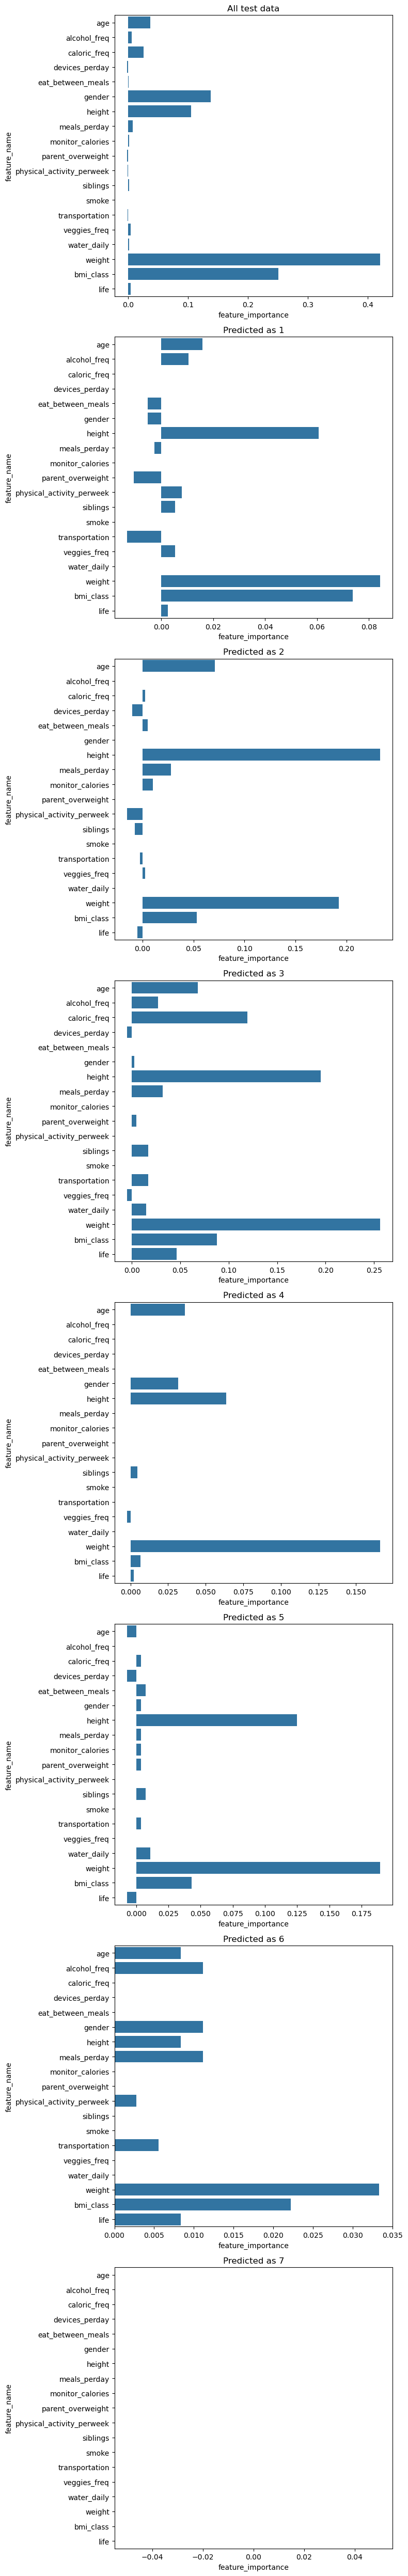

In [193]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importances(model, x, y, title, ax):
    result = permutation_importance(model, x, y, n_repeats=5)
    df = pd.DataFrame({'feature_name': cols, 'feature_importance': result.importances_mean, 'feature_std': result.importances_std})
    sns.barplot(data=df, x='feature_importance', y='feature_name',errorbar="ci", ci="sd", ax=ax)
    ax.set_title(title)


z = np.unique(y_pred)
fig, axes = plt.subplots(len(z)+1,1, figsize=(8, 50))
plot_feature_importances(rf, X_test, y_test, 'All test data', ax=axes[0])

for i,C in enumerate(z):
    plot_feature_importances(rf, X_test[y_pred == C], y_test[y_pred == C], f'Predicted as {C}', axes[i+1])
    print(i+1, C)

plt.tight_layout()
plt.show()